In [4]:
L=range(10000)
%timeit [i**2 for i in L]

7.42 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
import numpy as np
L=np.arange(10000)
%timeit L**2

17.6 µs ± 400 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [6]:
a=np.random.random((10, 3))
print(a)
b=np.array([a[j][np.argsort(np.abs(a[j] - 0.5))[0]] for j in range(10)])
print(b)

[[0.78464456 0.42506217 0.98510831]
 [0.52256226 0.50018936 0.05624816]
 [0.80440612 0.66058649 0.06000806]
 [0.66307592 0.71872876 0.01121863]
 [0.3086311  0.12190792 0.6443009 ]
 [0.44077115 0.55897313 0.36795052]
 [0.70082948 0.36924647 0.15834961]
 [0.13744794 0.57033955 0.17112612]
 [0.66517947 0.85221753 0.14086332]
 [0.93492347 0.22206198 0.29026466]]
0.4250621679051825
0.5001893648184743
0.6605864918331007
0.6630759242009409
0.6443008980186349
0.5589731332674571
0.36924646868161914
0.5703395482443754
0.6651794651713794
0.29026465759116293


Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [8]:
a=np.random.random((6, 6))
print(a)
for j in range(6):
    s=0
    for i in range(6):
        s=s+a[j,i]
    m=a[0,j]
    for i in range(6):
        if (a[i,j]<m):
            m=a[i,j]
    s=s/m
    print(s)

[[0.34233671 0.45410495 0.38757454 0.32182284 0.26509876 0.30622101]
 [0.04459705 0.35518297 0.0494933  0.88945124 0.2593414  0.613532  ]
 [0.2364645  0.28410295 0.42702628 0.66618747 0.28163796 0.17232836]
 [0.9882627  0.28630729 0.20230699 0.74898135 0.80492449 0.40787135]
 [0.9899479  0.31561792 0.30716908 0.01070881 0.89345516 0.04520228]
 [0.37703789 0.74891119 0.8719596  0.57789625 0.15416212 0.45627452]]
46.57614927619685
7.784494740296938
41.778329549693744
321.1052017107568
16.61952489409482
70.4885154931653


На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [11]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
m=0
for i in range(8):
    if (x[i]==0 and x[i+1]>m):
        m=x[i+1]
print(m)

5


Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [10]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for j in range(8):
    x[i[j]]= x[i[j]]+1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать не более двух циклов while (for).

In [174]:
from math import sqrt
from itertools import product

def distance(a, b):
    dist=0
    for i in range(len(a)):
        dist+=(float(a[i])-b[i])**2
    dist=sqrt(dist)
    return dist

def cent(c, b, obs):
    for i in range(np.shape(obs)[0]):
        c[b[i]]=0
    o=[[float(obs[i,j])/np.count_nonzero(b==b[i]) for j in range(np.shape(obs)[1])] for i in range(np.shape(obs)[0])]
    for i in range(np.shape(obs)[0]):
        c[b[i]]=c[b[i]]+o[i]
    return c



def k_means(obs, k_or_guess, iter=20, thresh=1e-05):
    b=np.zeros((np.shape(obs)[0]), dtype=np.int16)
    c=np.random.rand(k_or_guess,np.shape(obs)[1])
    changes=1
    d=np.ones((np.shape(obs)[0]), dtype=np.float)
    d=d*100
    for r in range(iter):
        if changes==0:
            break
        else:
            changes=0
            for i,j in product(range(np.shape(obs)[0]), range(k_or_guess)):
                dist=distance(obs[i,:],c[j,:])
                if dist<d[i]:
                    if b[i]!=j:
                        changes=1
                    b[i]=j
                    d[i]=dist
            c=cent(c,b,obs)
            d=[distance(obs[i,:],c[b[i],:]) for i in range(np.shape(obs)[0])]
            dist=sum(d)/1000
    return c, dist, b
            
                       
                


С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возраст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

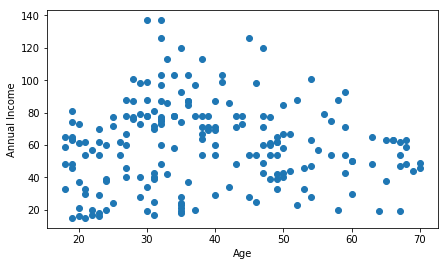

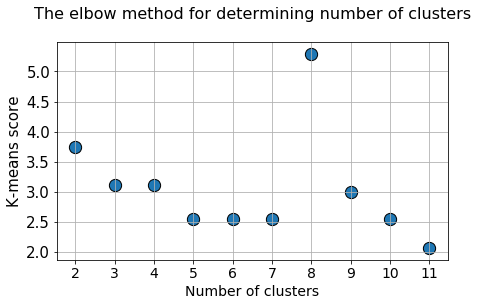

In [214]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

import matplotlib as mpl
import matplotlib.pyplot as plt


plt.figure(figsize=(7,4))
plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=[k_means(data[:, [2, 3]], i)[1]  for i in range(2,12)],s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()




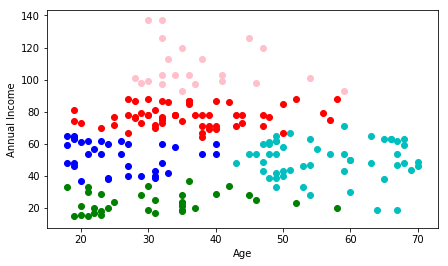

In [220]:
%matplotlib inline
bb=k_means(data[:, [2, 3]], 5)[2]

a1=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==0])
a2=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==1])
a3=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==2])
a4=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==3])
a5=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==4])

plt.figure(figsize=(7,4))
plt.scatter(a1[:, 2], a1[:, 3], c='pink')
plt.scatter(a2[:, 2], a2[:, 3], c='r')
plt.scatter(a3[:, 2], a3[:, 3], c='g')
plt.scatter(a4[:, 2], a4[:, 3], c='b')
plt.scatter(a5[:, 2], a5[:, 3], c='c')

plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()
    

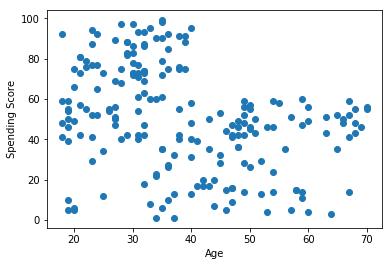

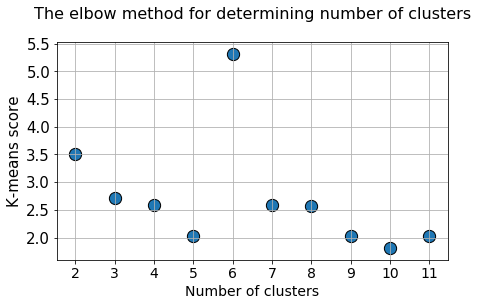

In [206]:
    
plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()
   

plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=[k_means(data[:, [2, 4]], i)[1]  for i in range(2,12)],s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()
        

    



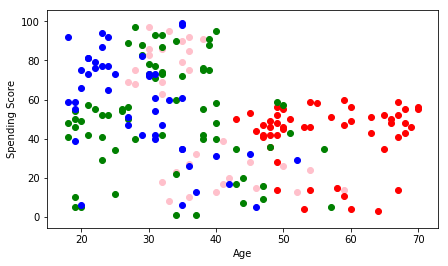

In [256]:
bb=k_means(data[:, [2, 3]], 6)[2]

a1=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==0])
a2=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==1])
a3=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==2])
a4=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==3])

plt.figure(figsize=(7,4))
plt.scatter(a1[:, 2], a1[:, 4], c='pink')
plt.scatter(a2[:, 2], a2[:, 4], c='r')
plt.scatter(a3[:, 2], a3[:, 4], c='g')
plt.scatter(a4[:, 2], a4[:, 4], c='b')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

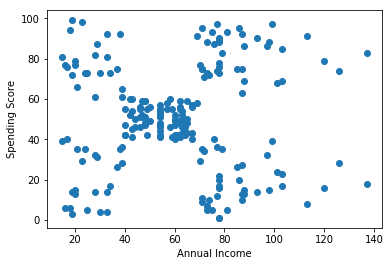

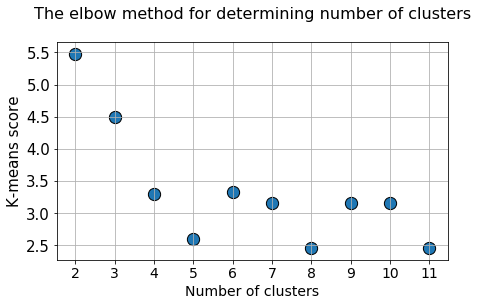

In [207]:

plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()    
    
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=[k_means(data[:, [3, 4]], i)[1]  for i in range(2,12)],s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


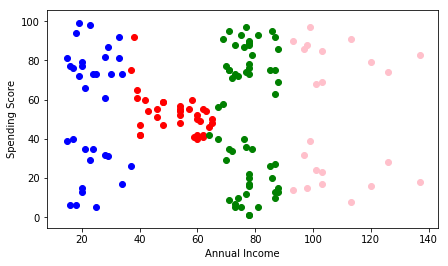

In [274]:
bb=k_means(data[:, [2, 3]], 6)[2]

a1=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==0])
a2=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==1])
a3=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==2])
a4=np.array([[data[i,j] for j in range(np.shape(data)[1])] for i in range(np.shape(data)[0]) if bb[i]==3])

plt.figure(figsize=(7,4))
plt.scatter(a1[:, 3], a1[:, 4], c='pink')
plt.scatter(a2[:, 3], a2[:, 4], c='r')
plt.scatter(a3[:, 3], a3[:, 4], c='g')
plt.scatter(a4[:, 3], a4[:, 4], c='b')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()